# 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 1. 데이터 로드

In [5]:
df = pd.read_excel('화재 위험도 계산 데이터/최종본.xlsx')
df.head()

,year,month,day,ws,ta,hm,rn,result,pa,ps,td,ss,si,ts
0,2019,1,1,3.0,4.1,36,0.0,0,1019.9,1028.6,-9.6,1.0,2.08,17.1
1,2019,1,2,3.9,4.2,30,0.0,1,1021.5,1030.2,-11.8,1.0,2.12,17.8
2,2019,1,3,5.1,5.3,20,0.0,1,1023.5,1032.2,-15.9,1.0,2.14,17.8
3,2019,1,4,5.8,6.3,20,0.0,0,1019.7,1028.4,-15.0,0.1,0.83,9.8
4,2019,1,5,4.4,7.0,40,0.0,1,1015.3,1023.3,-5.7,0.3,0.79,15.4


In [6]:
result_counts = df['result'].value_counts(normalize=True) * 100  # 비율(%)
print("result 0과 1의 비율:")
print(result_counts)

result 0과 1의 비율:
result
0    72.109589
1    27.890411
Name: proportion, dtype: float64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

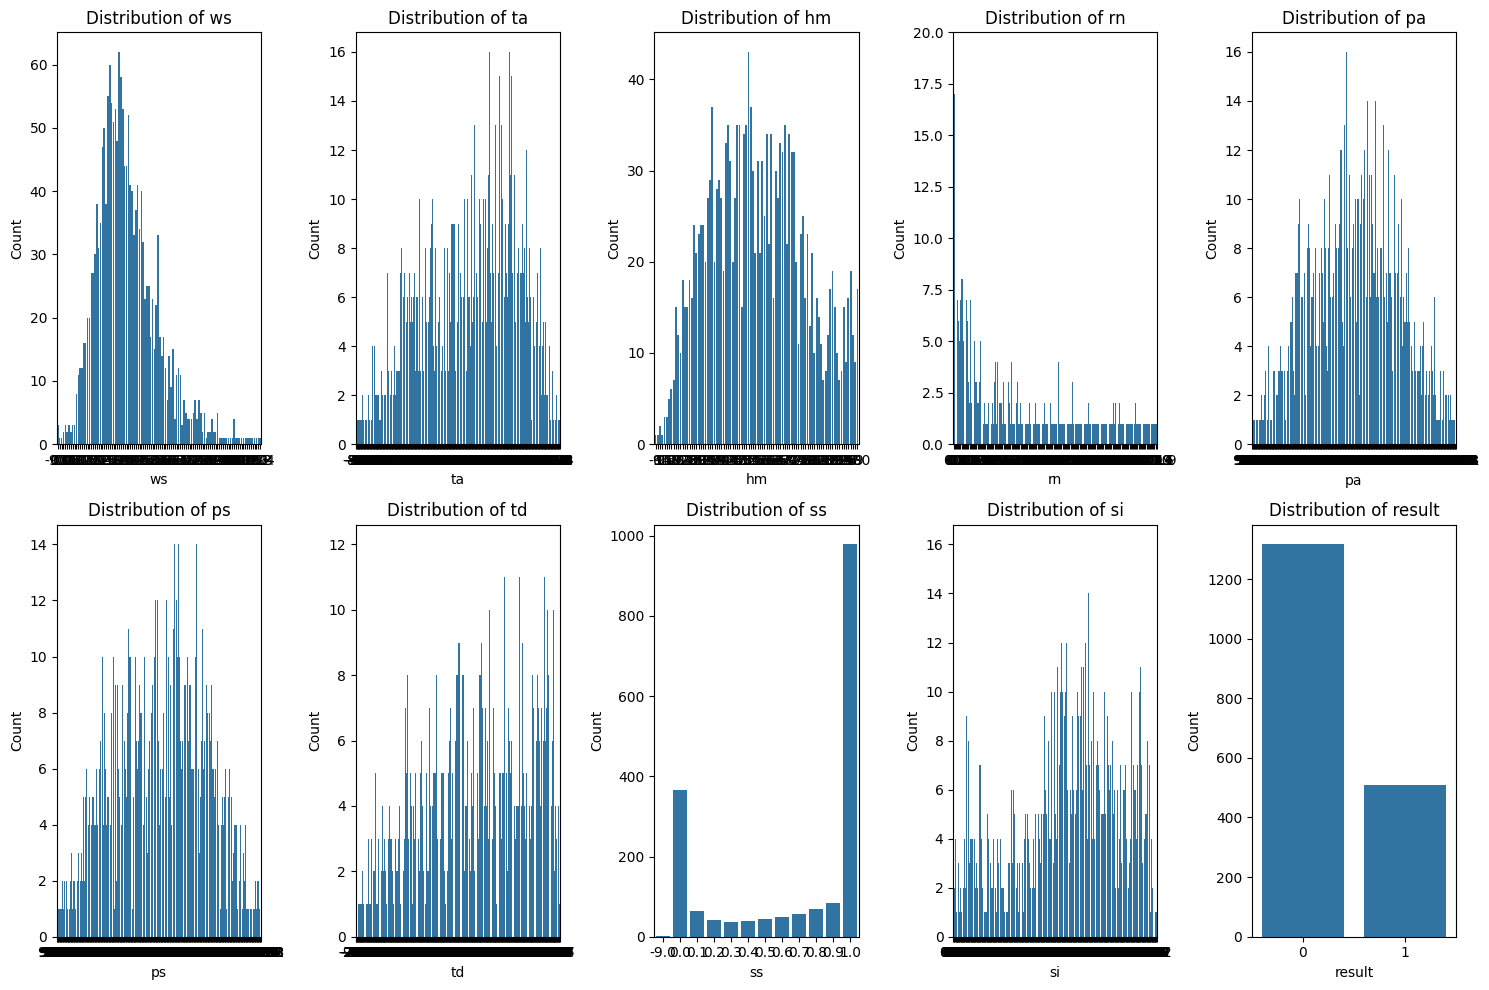

In [9]:
# 변수 리스트
columns_to_plot = ['ws', 'ta', 'hm', 'rn', 'pa', 'ps', 'td', 'ss', 'si', 'result']
# 바플롯 시각화
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 5, i + 1)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    # rn의 y축 범위 조정
    if column == 'rn':
        plt.ylim(0, 20)  # y축 범위를 0에서 5로 설정

plt.tight_layout()
plt.show()

# 2. 특징과 레이블 선택

In [10]:
X = df[['year', 'month', 'day', 'ws', 'ta', 'hm', 'rn', 'pa', 'ps', 'td', 'ss', 'si']]  # 특징
y = df['result']  # 레이블

# 3. 데이터 분할
(훈련/검증 세트, 비율: 90:10)   

In [11]:
# 훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# 4. 모델 생성

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. 예측 및 평가

In [13]:
test_pred = model.predict(X_test)

# 모델 평가
print("검증 세트 정확도:", accuracy_score(y_test, test_pred))
print("검증 세트 ROC AUC 점수:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("검증 세트 보고서:\n", classification_report(y_test, test_pred))

검증 세트 정확도: 0.726775956284153
검증 세트 ROC AUC 점수: 0.6231431966726084
검증 세트 보고서:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       132
           1       0.53      0.16      0.24        51

    accuracy                           0.73       183
   macro avg       0.64      0.55      0.54       183
weighted avg       0.69      0.73      0.67       183



In [14]:
test_pred_proba = model.predict_proba(X_test)[:, 1]  # 양성 클래스에 대한 확률

# 7. 테스트 세트와 예측 결과 출력
test_results = pd.DataFrame({
    '정답': y_test,
    '예측': test_pred,
    '예측 확률': test_pred_proba,
    '날짜': pd.to_datetime(X_test[['year', 'month', 'day']]).dt.strftime('%Y-%m-%d'),
    '풍속 (ws)': X_test['ws'].values,
    '기온 (ta)': X_test['ta'].values,
    '습도 (hm)': X_test['hm'].values,
    '일일강수량 (rn)': X_test['rn'].values
})

In [15]:
print("\n테스트 세트 결과:")
test_results.sample(15)


테스트 세트 결과:


,정답,예측,예측 확률,날짜,풍속 (ws),기온 (ta),습도 (hm),일일강수량 (rn)
1282,1,1,0.53,2022-07-07,7.9,35.3,56,0.0
1480,0,0,0.26,2023-01-21,3.1,4.6,20,0.0
1534,1,0,0.30,2023-03-16,4.3,13.1,21,0.0
557,0,0,0.10,2020-07-11,2.3,22.7,89,0.0
219,1,0,0.23,2019-08-08,2.9,30.4,72,0.0
1069,0,1,0.56,2021-12-06,2.0,16.3,64,0.1
1620,1,0,0.05,2023-06-10,3.4,21.9,88,0.0
941,0,0,0.42,2021-07-31,4.9,28.3,85,4.2
1695,0,0,0.24,2023-08-24,5.7,28.5,78,48.1
1251,1,0,0.25,2022-06-06,2.6,23.1,68,4.8


# 6. 피처 중요도

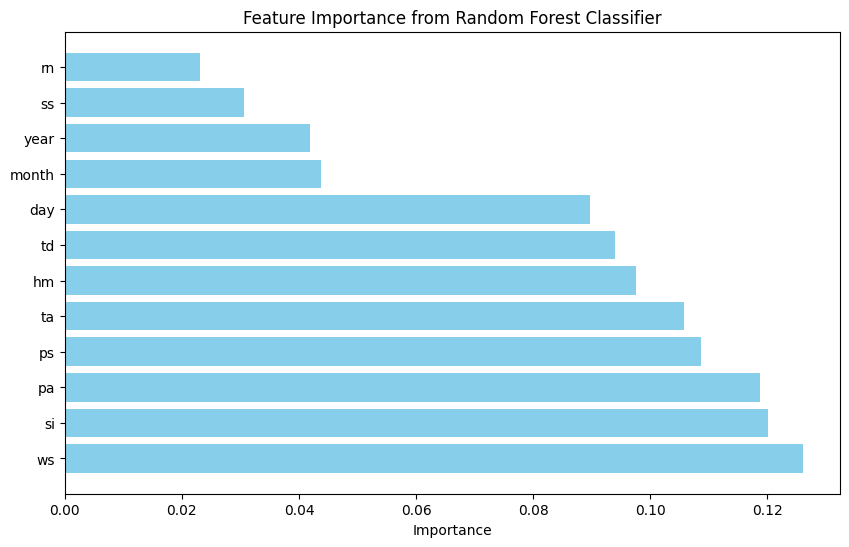

In [16]:
# 특성 중요도 가져오기
importances = model.feature_importances_

# 피처 이름과 중요도를 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 중요도 기준으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.show()